# **Visual Information Processing Lab**

# LearningRateScheduler

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/My Drive/2021/MTech/Files/')
print(os.getcwd())

/content/drive/My Drive/2021/MTech/Files


### Datasets and Pre Processing

In [3]:
import keras
from keras.datasets import mnist

In [4]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
3
float32
3
float32
3
float32


In [9]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [10]:
import numpy as np
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

2.8215446 2.8215446
-0.42407447 -0.42407447
9 9
0 0
-3.4560264e-07
0.9999998
2.8215454 2.8215454
-0.4240742 -0.4240742


In [11]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
print(xtrain.shape)
xtest =  xtest.reshape(xtest.shape[0],28,28,1)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
from keras.utils import to_categorical
ytrain =  to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### LeNet Model

In [13]:
import keras
from keras import models
from keras import layers

In [14]:
from keras.regularizers import l1
import tensorflow as tf

In [15]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu', strides=(1,1), padding='valid',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.Dense(84, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))

model.add(layers.Dense(10, activation='softmax',kernel_regularizer=tf.keras.regularizers.l1(0.01)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### Compile and Training the model

In [16]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [17]:
os.chdir('/content/drive/My Drive/2021/MTech/Weights/')

print(os.getcwd())

from keras.callbacks import ModelCheckpoint,CSVLogger,EarlyStopping,ReduceLROnPlateau,LearningRateScheduler
mc = ModelCheckpoint('CNN_MNIST.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=5)
rp = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)
cv = keras.callbacks.CSVLogger('CNN_MNIST.csv', separator=',', append=False)
lr = LearningRateScheduler(scheduler)

/content/drive/My Drive/2021/MTech/Weights


In [18]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, callbacks= [mc,cv, es, rp, lr],epochs=25, verbose=1)

Epoch 1/25
188/188 [==============================] - 32s 13ms/step - loss: 30.9028 - accuracy: 0.2345 - val_loss: 25.0334 - val_accuracy: 0.5305

Epoch 00001: val_loss improved from inf to 25.03339, saving model to CNN_MNIST.h5
Epoch 2/25
188/188 [==============================] - 2s 9ms/step - loss: 23.0171 - accuracy: 0.6075 - val_loss: 17.4860 - val_accuracy: 0.8201

Epoch 00002: val_loss improved from 25.03339 to 17.48605, saving model to CNN_MNIST.h5
Epoch 3/25
188/188 [==============================] - 2s 9ms/step - loss: 16.0751 - accuracy: 0.8309 - val_loss: 12.1963 - val_accuracy: 0.8478

Epoch 00003: val_loss improved from 17.48605 to 12.19631, saving model to CNN_MNIST.h5
Epoch 4/25
188/188 [==============================] - 2s 9ms/step - loss: 11.1257 - accuracy: 0.8487 - val_loss: 8.2077 - val_accuracy: 0.8438

Epoch 00004: val_loss improved from 12.19631 to 8.20774, saving model to CNN_MNIST.h5
Epoch 5/25
188/188 [==============================] - 2s 8ms/step - loss: 7.4

### Evaluate

In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 1.0258 - accuracy: 0.8762


[1.0258194208145142, 0.8762000203132629]

### Prediction

In [ ]:
pred=model.predict(xtest[0].reshape(1,28,28,1))
print(pred)
print(pred.argmax())

[[5.5646489e-04 1.3982202e-05 1.7523895e-03 1.9166302e-02 6.5997476e-05
  2.2560495e-04 1.7245368e-06 9.6897405e-01 3.4652820e-03 5.7782712e-03]]
7


In [ ]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.0258 - accuracy: 0.8762
1.0258194208145142
0.8762000203132629


### Loss and Accuracy Curves

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

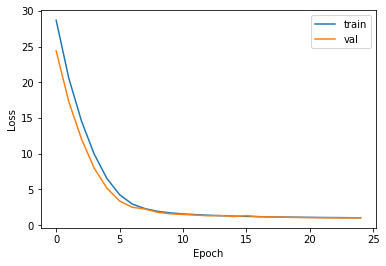

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

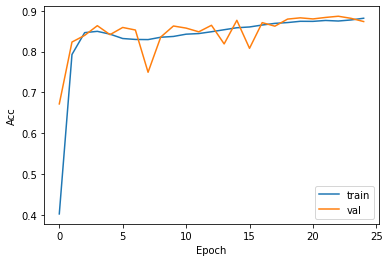

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])